# Q1

### part a
write down the design matrix X

In [54]:
# Use R for this question, but do not use the lm() function.
# Suppose (0, 1), (1, 3), (2, 5), (3, 6), (4, 5), (5, 7) are 6 independently observed data points, and a simple regression model (with intercept) is to be ﬁt to these data.


# Write down the design matrix X.
X = matrix(c(0, 1, 1, 3, 2, 5, 3, 6, 4, 5, 5, 7), nrow = 6, ncol = 2, byrow = TRUE)
head(X)
n = nrow(X)
y <- X[, 2]
X <- X[, 1] # remove y

X1 <- rep(1, n)
X_design_matrix <- cbind(X1, X)
head(X_design_matrix)

0,1
1,3
2,5
3,6
4,5
5,7


X1,X
1,0
1,1
1,2
1,3
1,4
1,5


### Part b

determine the QR decomposition for X

In [55]:
# Determine the QR decomposition for X.
QR <- qr(X_design_matrix)
# QR

Q <- qr.Q(QR, complete = TRUE)
R <- qr.R(QR)
Q
R

-0.4082483,-0.5976143,-0.39966534,-0.3614756,-0.3232858,-0.2850961
-0.4082483,-0.3585686,-0.06213786,0.1879790,0.4380958,0.6882127
-0.4082483,-0.1195229,0.88170280,-0.1180607,-0.1178243,-0.1175878
-0.4082483,0.1195229,-0.12913187,0.8228959,-0.2250764,-0.2730487
-0.4082483,0.3585686,-0.13996653,-0.2361476,0.6676714,-0.4285096
-0.4082483,0.5976143,-0.15080120,-0.2951910,-0.4395807,0.4160295


X1,X
-2.44949,-6.123724
0.00000,4.183300


### part c

Calculate inverse U

In [56]:
p <- 2  # number of columns in X -> 2
Q1 <- Q[, 1:p]
Q1
# y <- X[, 1] # 这里改成X的第二列是y
Q1y <- t(Q1)%*%y
U <- qr.R(QR)
inverse_U <- solve(U)
inverse_U

-0.4082483,-0.5976143
-0.4082483,-0.3585686
-0.4082483,-0.1195229
-0.4082483,0.1195229
-0.4082483,0.3585686
-0.4082483,0.5976143


X1,-0.4082483,-0.5976143
X,0.0000000,0.2390457


### part d 

slope and intercept estimate

In [57]:
betahat <- solve(U, Q1y)
betahat

X1,1.857143
X,1.057143


### part e

determine the residual sum of square

In [58]:
Q2 <- Q[, -(1:p)]
Q2
Q2y <- t(Q2)%*%y

SSE <- t(Q2y)%*%Q2y
SSE

-0.39966534,-0.3614756,-0.3232858,-0.2850961
-0.06213786,0.1879790,0.4380958,0.6882127
0.88170280,-0.1180607,-0.1178243,-0.1175878
-0.12913187,0.8228959,-0.2250764,-0.2730487
-0.13996653,-0.2361476,0.6676714,-0.4285096
-0.15080120,-0.2951910,-0.4395807,0.4160295


3.942857


### part f

estimate the error variance

In [61]:
# estimate the error variance
MSE <- SSE/(n-p)
cat("MSE = ", MSE)
# MSE

MSE =  0.9857143

### part g

calculate the test statistic used to determine whether the slope is 0 or not

In [62]:
QTy <- t(Q)%*%y
Q2Ty <- QTy[-(1:p)] 
MSE <- mean(Q2Ty^2) # MSE

U_1 <- solve(U) # inverse of U
U.diag <- diag(U_1%*%t(U_1))# extracts the diagonal from a matrix
T <- betahat/sqrt(MSE * U.diag) 
T[2] # slope of the 2nd value

[1] 4.454277

### part h

In [63]:
# conﬁdence interval
Cii <- sqrt(diag(solve(t(U)%*%U))) 
SEii <- Cii*as.numeric(sqrt(MSE))

In [64]:
# A 95% conﬁdence interval for the slope is
betahat[2] + SEii[2]*qt(c(.025, .975), df = n-p)

[1] 0.3982033 1.7160824

**Answer**

Based on the 95% CI, we can tell that there are 95% possibility that the slope is lying in the range of (0.39820328100234, 1.71608243328337). 

It CI does not contain the 0, which means we can reject the nul hypothesis(slope = 0).

# Q2

The p13.2 data frame in the MPV package has 20 observations on home ownership as it relates to family income. Fit a logistic regression model to the data and use the output to

In [65]:
library(MPV)
head(p13.2)
# X: family income
# Y: home ownership
nrow(p13.2)

,x,y
,<dbl>,<dbl>
1,38000,0
2,51200,1
3,39600,0
4,43400,1
5,47700,0
6,53000,0


[1] 20

### part a

identify the logit of the probability of home ownership as a linear function of family income.

In [66]:
p13.2.glm <- glm(y~x, data = p13.2, family = binomial)
coef(p13.2.glm)

(Intercept)             x 
-8.7395139021  0.0002009056

### part b

determine if the logistic model is reasonable.

In [ ]:
min(p13.2$x)
max(p13.2$x)

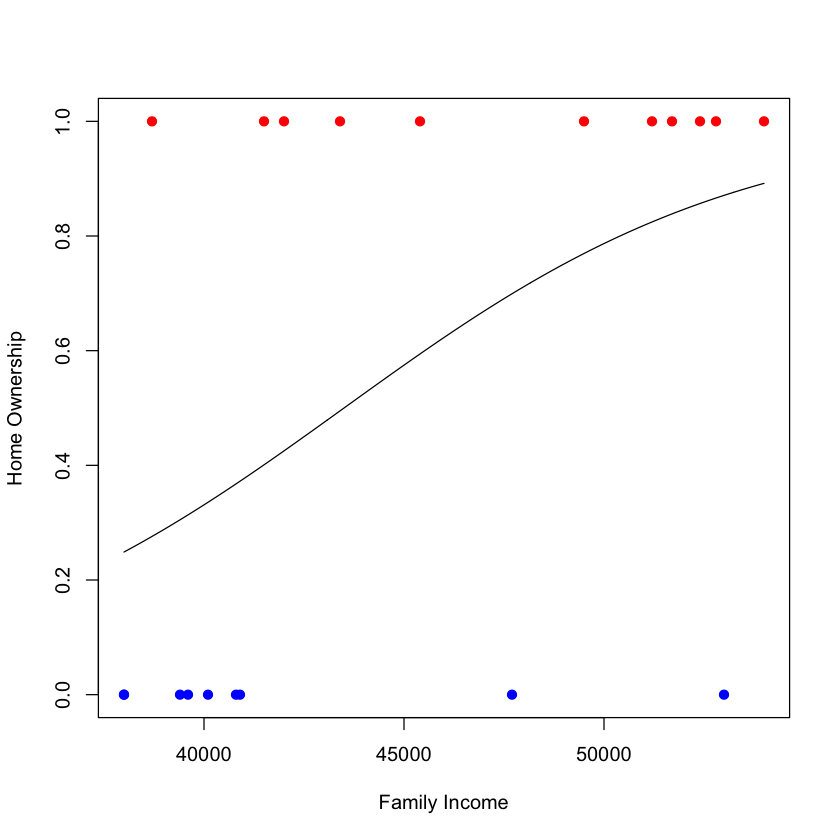

In [67]:
plot(y~x, data = p13.2, col=ifelse(p13.2$y==1, "red", "blue"), xlab="Family Income", ylab="Home Ownership", pch=20, cex=1.5)
xpoints <- seq(38000, 54000, length=401)
ypredict <- predict(p13.2.glm, newdata=data.frame(x = xpoints), type="response")
lines(xpoints, ypredict)

The curve seems to predict low probability of owning a home at low values of income and higher probability at high values of income.

### part c

estimate the probability that a family with an income of $40000 owns their home.

In [68]:
y_pred <- predict(p13.2.glm, newdata=data.frame(x = 40000), type="response")
cat("There is a", y_pred*100, "% chance that a family with an income of $40,000 will own a home.")

There is a 33.10835 % chance that a family with an income of $40,000 will own a home.

# Q3

Inspect the dependency of the number of seizures ( y ) in the age of the patient (age) and the treatment (trt).

In [69]:
# ? MASS::epil
library(MASS)

In [70]:
# X: the age of the patient (age) and the treatment (trt).
# Y : number of seizures
head(epil)
df <- data.frame(age = epil$age, trt = epil$trt, y = epil$y)
head(df)

,y,trt,base,age,V4,subject,period,lbase,lage
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,5,placebo,11,31,0,1,1,-0.7563538,0.11420370
2,3,placebo,11,31,0,1,2,-0.7563538,0.11420370
3,3,placebo,11,31,0,1,3,-0.7563538,0.11420370
4,3,placebo,11,31,1,1,4,-0.7563538,0.11420370
5,3,placebo,11,30,0,2,1,-0.7563538,0.08141387
6,5,placebo,11,30,0,2,2,-0.7563538,0.08141387


,age,trt,y
,<int>,<fct>,<int>
1,31,placebo,5
2,31,placebo,3
3,31,placebo,3
4,31,placebo,3
5,30,placebo,3
6,30,placebo,5


### part a

Fit a Poisson regression with glm.

In [71]:
# find how many unique value in trt
unique(df$trt)
# convert the trt into 1 and 0
df$trt <- ifelse(df$trt == "placebo", 0, 1)
head(df)

[1] placebo   progabide
Levels: placebo progabide

,age,trt,y
,<int>,<dbl>,<int>
1,31,0,5
2,31,0,3
3,31,0,3
4,31,0,3
5,30,0,3
6,30,0,5


In [76]:
# x contain age and trt
df.glm <- glm(y~age+trt, data=epil, family=poisson)
coef(df.glm)

(Intercept)          age trtprogabide 
  2.53303137  -0.01333147  -0.09251375

### part b

Are the coeﬃcients signiﬁcant?

In [77]:
summary(df.glm)


Call:
glm(formula = y ~ age + trt, family = poisson, data = epil)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3628  -2.4087  -1.3791   0.0006  17.8489  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.533031   0.110638  22.895  < 2e-16 ***
age          -0.013331   0.003708  -3.596 0.000324 ***
trtprogabide -0.092514   0.045596  -2.029 0.042460 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2517.8  on 235  degrees of freedom
Residual deviance: 2502.0  on 233  degrees of freedom
AIC: 3273.9

Number of Fisher Scoring iterations: 6


Based on the P_value from Pr(>|t|), both "age" and "trt" are not significant.

Only intercept has a significant value.

### part c

What is the 95% conﬁdence interval for the estimates of the coeﬃcients.

In [78]:
confint(df.glm, level=0.95)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),2.31587948,2.749603939
age,-0.02062141,-0.006086226
trtprogabide,-0.18188033,-0.003117740


### part d

Does the treatment reduce the frequency of the seizures?

Due to the coefficient by trtprogabide is negative, so the treatment reduce the frequency of the seizures

The 95% confidence interval for the treatment effect is (-0.18188033, -0.003117740), so there is 95% possibility that the treatment can reduce the frequency of the seizures

### part e

According to this model, what would be the number of seizures for 20 years old patient with progabide treatment?

In [85]:
# According to this model, what would be the number of seizures for 20 years old patient with progabide treatment?

y_pred <- predict(df.glm, newdata=data.frame(age = 20, trt='progabide'), type="response")
cat("the number of seizures for 20 years old patient with progabide treatment is", y_pred)

the number of seizures for 20 years old patient with progabide treatment is 8.792404